# Question 1

In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.power import FTestAnovaPower
from numpy import array
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.multicomp as mc
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Read the original data

In [2]:
import pandas as pd
suicide = pd.read_csv('C:/Users/vicki/iCloudDrive/Desktop/U of T/Master 1/winter2020/inf2178/project/master.csv', header=0)
suicide

country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
...           ...   ...     ...          ...          ...         ...   
27815  Uzbekistan  2014  female  35-54 years          107     3620833   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27817  Uzbekistan  2014    male   5-14 years           60     2762158   
27818  Uzbekistan  2014  female   5-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicide_rate    country-year  HDI for year  gdp_for_year ($)   \
0              6.71     Albania1987           NaN      2,156,624,900   
1              5.19     Albania1987           NaN      2,156,624,900   
2              4.83     Albania1987           NaN      2,156,624,900   
3              4.59     Albania1987           NaN      2,156,624,900   
4              3.28     Albania1987           NaN      2,156,624,900   
...             ...             ...           ...                ...   
27815          2.96  Uzbekistan2014         0.675     63,067,077,179   
27816          2.58  Uzbekistan2014         0.675     63,067,077,179   
27817          2.17  Uzbekistan2014         0.675     63,067,077,179   
27818          1.67  Uzbekistan2014         0.675     63,067,077,179   
27819          1.46  Uzbekistan2014         0.675     63,067,077,179   

       gdp_per_capita       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Generation  
4                 796          Boomers  
...               ...              ...  
27815            2309     Generation X  
27816            2309           Silent  
27817            2309     Generation Z  
27818            2309     Generation Z  
27819            2309          Boomers  

[27820 rows x 12 columns]

## Descriptive Data

<AxesSubplot:xlabel='gdp_per_capita', ylabel='suicide_rate'>

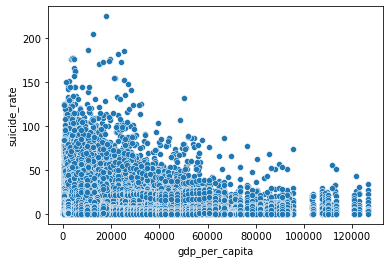

In [3]:
sns.scatterplot(x='gdp_per_capita', y='suicide_rate', data=suicide)

In [4]:
sr = suicide[["gdp_per_capita",  "suicide_rate"]]
sr.groupby([ "gdp_per_capita"]).describe()

suicide_rate                                              \
                      count       mean        std   min     25%     50%   
gdp_per_capita                                                            
251                    12.0   1.500000   1.459956  0.00  0.0000   1.060   
291                    12.0  15.953333  13.652416  0.34  4.7925  14.280   
313                    12.0  15.219167  13.526922  0.34  4.6600  11.390   
345                    12.0  16.108333  15.532277  0.35  3.6975   7.345   
357                    12.0   4.254167   3.709608  0.00  1.3200   3.685   
...                     ...        ...        ...   ...     ...     ...   
113120                 12.0  11.681667  14.114591  0.00  3.0325   7.695   
120423                 12.0   7.623333   7.554888  0.00  0.0000   5.485   
121315                 12.0   9.359167  12.981187  0.00  0.0000   4.445   
122729                 12.0  11.377500  10.005420  0.00  5.3600   8.710   
126352                 12.0  12.323333  10.883425  0.00  4.5600   7.860   

                                
                    75%    max  
gdp_per_capita                  
251              2.9200   3.49  
291             22.9950  38.63  
313             24.9850  42.89  
345             26.6825  43.66  
357              6.8000  11.30  
...                 ...    ...  
113120          15.1825  51.54  
120423          12.6250  21.36  
121315          12.1100  42.71  
122729          16.9925  30.79  
126352          18.3350  34.42  

[2233 rows x 8 columns]

## Linear Regression Model

In [5]:
from sklearn import linear_model
X = suicide['gdp_per_capita'].values.reshape(-1,1)
y = suicide['suicide_rate'].values.reshape(-1,1)
lm = linear_model.LinearRegression()
model = lm.fit(X, y)
print(model.coef_)
print(model.intercept_)

[[1.79212162e-06]]
[12.78587066]


# Question 2

# Read developed countries only (developed: gdp_per_capita>=12000)

In [8]:
suicide_new = suicide[suicide.gdp_per_capita >= 12000]
suicide_new

country  year     sex          age  suicides_no  \
480    Antigua and Barbuda  2005  female  15-24 years            0   
481    Antigua and Barbuda  2005  female  25-34 years            0   
482    Antigua and Barbuda  2005  female  35-54 years            0   
483    Antigua and Barbuda  2005  female   5-14 years            0   
484    Antigua and Barbuda  2005  female  55-74 years            0   
...                    ...   ...     ...          ...          ...   
27551              Uruguay  2015  female  25-34 years           23   
27552              Uruguay  2015  female  35-54 years           38   
27553              Uruguay  2015  female  15-24 years           17   
27554              Uruguay  2015    male   5-14 years            3   
27555              Uruguay  2015  female   5-14 years            2   

       population  suicide_rate             country-year  HDI for year  \
480          7780          0.00  Antigua and Barbuda2005           NaN   
481          7327          0.00  Antigua and Barbuda2005           NaN   
482         12835          0.00  Antigua and Barbuda2005           NaN   
483          8584          0.00  Antigua and Barbuda2005           NaN   
484          4157          0.00  Antigua and Barbuda2005           NaN   
...           ...           ...                      ...           ...   
27551      232133          9.91              Uruguay2015           NaN   
27552      440475          8.63              Uruguay2015           NaN   
27553      255067          6.66              Uruguay2015           NaN   
27554      252509          1.19              Uruguay2015           NaN   
27555      241598          0.83              Uruguay2015           NaN   

       gdp_for_year ($)   gdp_per_capita    generation  
480        1,022,191,296           12649    Millenials  
481        1,022,191,296           12649  Generation X  
482        1,022,191,296           12649       Boomers  
483        1,022,191,296           12649    Millenials  
484        1,022,191,296           12649        Silent  
...                  ...             ...           ...  
27551     53,274,304,222           16696    Millenials  
27552     53,274,304,222           16696  Generation X  
27553     53,274,304,222           16696    Millenials  
27554     53,274,304,222           16696  Generation Z  
27555     53,274,304,222           16696  Generation Z  

[12352 rows x 12 columns]

We named the dataset of developed countries only as 'suicide_new'

# Descriptive statistics

In [9]:
descriptive = suicide_new[["age", "sex", "suicide_rate"]]
descriptive.groupby(["sex", "age"]).describe()

suicide_rate                                            \
                          count       mean        std  min     25%    50%   
sex    age                                                                  
female 15-24 years       1031.0   3.731183   2.895776  0.0   1.550   3.42   
       25-34 years       1031.0   5.195684   3.772500  0.0   2.530   4.84   
       35-54 years       1031.0   7.293880   4.749571  0.0   3.640   7.16   
       5-14 years        1021.0   0.299207   0.491897  0.0   0.000   0.16   
       55-74 years       1031.0   8.482464   6.307790  0.0   4.075   7.38   
       75+ years         1031.0  10.913162  12.895117  0.0   2.685   7.10   
male   15-24 years       1031.0  13.961688   9.719373  0.0   6.995  12.52   
       25-34 years       1031.0  19.479428  12.292781  0.0  11.065  18.24   
       35-54 years       1031.0  23.705131  14.423536  0.0  13.410  22.99   
       5-14 years        1021.0   0.562870   0.723416  0.0   0.000   0.40   
       55-74 years       1031.0  25.398952  16.734837  0.0  15.350  22.58   
       75+ years         1031.0  41.561048  33.421531  0.0  18.600  35.60   

                                    
                       75%     max  
sex    age                          
female 15-24 years   5.330   16.79  
       25-34 years   7.165   29.16  
       35-54 years  10.155   23.03  
       5-14 years    0.390    5.08  
       55-74 years  12.610   55.25  
       75+ years    15.310  133.42  
male   15-24 years  20.060   61.03  
       25-34 years  26.115   74.60  
       35-54 years  30.515   97.21  
       5-14 years    0.810    9.22  
       55-74 years  34.075   90.70  
       75+ years    58.685  224.97

The table above shows the descriptive statistics of suicide rates among different genders in developed countries at different ages.

# Boxplot(suicide rate VS ages, among different genders)

<AxesSubplot:xlabel='age', ylabel='suicide_rate'>

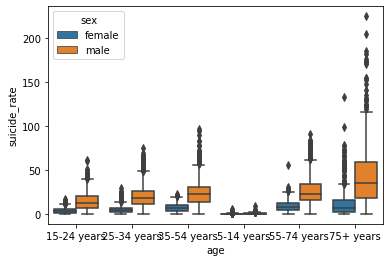

In [10]:
sns.boxplot(y="suicide_rate", x="age", hue="sex", data=suicide_new)

We made a boxplot of suicide rates among different genders in developed countries at different ages.

# Two way ANOVA

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
lmodel = ols('suicide_rate ~ C(age) + C(sex) + C(age):C(sex)', data = suicide_new).fit()
anova_table = sm.stats.anova_lm(lmodel, typ=3)
anova_table

sum_sq       df           F         PR(>F)
Intercept      1.435330e+04      1.0   81.781928   1.744813e-19
C(age)         7.212262e+04      5.0   82.187737   3.522622e-85
C(sex)         5.395389e+04      1.0  307.417272   5.310637e-68
C(age):C(sex)  2.518898e+05      5.0  287.042430  1.851850e-291
Residual       2.165757e+06  12340.0         NaN            NaN

Two way anova means there are two independent variables: 'age' and 'sex'. Besides, we have unbalanced data(unequal sample size for each group), so we set 'typ=3', type 3 sums of squares(SS)is recommended for an unbalanced design for multifactorial ANOVA. (perform similar steps as described for two-way ANOVA with the balanced design but set 'typ=3')
The pv of variables 'age' and 'sex' are too small. -> significant
The PV obtained from ANOVA analysis for sex and age, and their interaction are statistially significant (pv<0.05).
So, we conclude that age significantly affects suicide rates; gender significantly affects suicide rate. And the interaction of age and gender significantly affects 'suicide rate'.


# Install the package of bioinfokiit (to do Tukey ANOVA)

In [12]:
! pip install bioinfokit

  Created wheel for bioinfokit: filename=bioinfokit-2.0.2-py3-none-any.whl size=56196 sha256=22bbf615be4b4e0ecddd7542a60b6ed4ac7596b297d0deb6c259e9746b48e932
  Stored in directory: c:\users\vicki\appdata\local\pip\cache\wheels\77\6f\13\177b53f81800f43d7051cb193daec7a492474edc037ea7d20b
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.6-py3-none-any.whl size=32067 sha256=5e7e2948587df6a965fdfc94acef539c19cc0bea54422739da746066da1cb7f3
  Stored in directory: c:\users\vicki\appdata\local\pip\cache\wheels\82\e4\64\dd790d424818bc2f59c11471a1eee5dc8cfcd3f8ee8c4812fa
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7103 sha256=8cd68ee713ffbd80ca77250689fba634f3d4af880dd754b3f3f5fef9f49f1cd8
  Stored in directory: c:\users\vicki\appdata\local\pip\cache\wheels\06\b2\e0\b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
Successfully built bioinfokit matplotlib-venn adjustText


# Post hoc test (multiple pairwise comparsions)

we know that age and sex differences are statistically significant, but ANOVA does not tell which sex and age are significantly different from each other. To know the pairs of significant different age and sex, perform multiple pairwise comparison (Post-hoc comparison) analysis using Tukey’s HSD test.

### perform multiple pairwise comparison (Tukey HSD) for main effects 'age'

C:\Users\vicki\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


<class 'statsmodels.iolib.table.SimpleTable'>

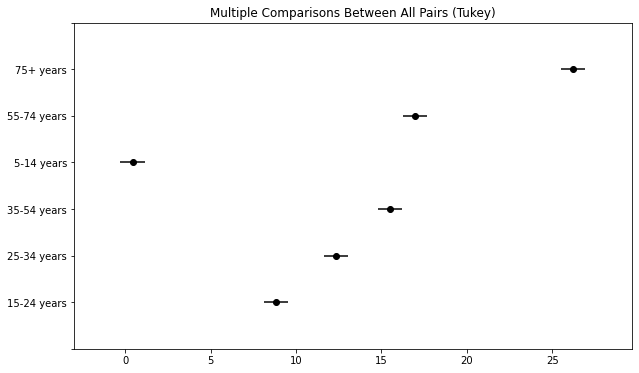

In [13]:
import statsmodels.stats.multicomp as mc
age1= suicide_new.age.astype(str)
comp = mc.MultiComparison(suicide_new['suicide_rate'], age1)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.plot_simultaneous()
post_hoc_res.summary()

### perform multiple pairwise comparison (Tukey HSD) for main effects 'sex'

In [14]:
from bioinfokit.analys import stat
res = stat()
res.tukey_hsd(df=suicide_new, res_var='suicide_rate', xfac_var='sex', anova_model='suicide_rate ~ C(age)+C(sex)+C(age):C(sex)')
res.tukey_summary

group1 group2      Diff      Lower      Upper    q-value  p-value
0  female   male  14.22253  13.520792  14.924269  56.193714    0.001

### perform multiple pairwise comparison (Tukey HSD) for interaction effect between age and sex

C:\Users\vicki\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


<class 'statsmodels.iolib.table.SimpleTable'>

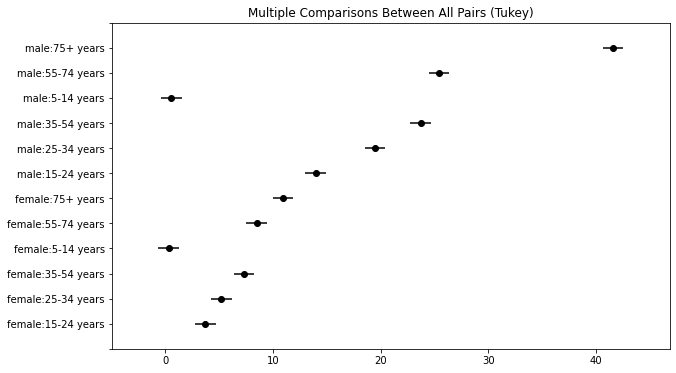

In [15]:
import statsmodels.stats.multicomp as mc
interaction = suicide_new.sex.astype(str) + ':' + suicide_new.age.astype(str)
compare = mc.MultiComparison(suicide_new['suicide_rate'], interaction)
post_hoc_res = compare.tukeyhsd()
post_hoc_res.plot_simultaneous()
post_hoc_res.summary()


### Filtering all rows of reject = False

In [16]:
age_sex_summary = post_hoc_res.summary()
age_sex_summary1 = []
for item in age_sex_summary.data:
    if item[-1] == False:
        age_sex_summary1.append(item)
df1 = DataFrame(age_sex_summary1,columns=['group1', 'group2', 'meandiff', 'p-adj', 'lower', 'upper', 'reject'])
df1

group1              group2  meandiff   p-adj   lower   upper  \
0  female:15-24 years  female:25-34 years    1.4645  0.3339 -0.4428  3.3718   
1  female:35-54 years  female:55-74 years    1.1886  0.6449 -0.7187  3.0959   
2   female:5-14 years     male:5-14 years    0.2637  0.9000 -1.6529  2.1802   
3    male:35-54 years    male:55-74 years    1.6938  0.1394 -0.2134  3.6011   

   reject  
0   False  
1   False  
2   False  
3   False

# Test ANOVA Assumptions

### QQ-Plot (check whether the residuals are normal distributed)

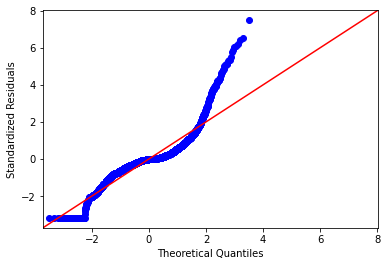

In [17]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

res.anova_std_residuals are standardized residuals obtained from two-way ANOVA.
In the residual plot(qq-plot), standardized residuals lie around the 45-degree line, it suggests that the residuals are approximately normally distributed.

### Histogram(check whether the residuals are normal distributed)

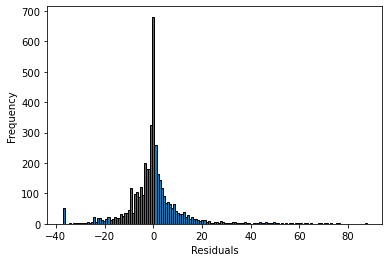

In [18]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

The histogram shows the approximately normal distribution of residuals.

### Levene’s test(check the assumption of homogeneity of variances)

In [19]:
from bioinfokit.analys import stat 
res = stat()
res.levene(df=suicide_new, res_var='suicide_rate', xfac_var=['sex', 'age'])
res.levene_summary

Parameter     Value
0      Test statistics (W)  246.0722
1  Degrees of freedom (Df)   11.0000
2                  p value    0.0000

As the p value (0.000 < 0.05) is significant, we reject the null hypothesis and conclude that treatments have unequal variances. Fail to check the assumption of homogeneity of variances.

# Question 3

In [20]:
import pandas as pd
import numpy as np
from numpy import array
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.multicomp as mc
from pandas import DataFrame

## Read the data for Canada only

In [22]:
suicide_Canada= suicide[suicide.country=="Canada"]
suicide_Canada

country  year     sex          age  suicides_no  population  \
4916  Canada  1985    male    75+ years          111      390200   
4917  Canada  1985    male  55-74 years          502     1841000   
4918  Canada  1985    male  25-34 years          605     2240500   
4919  Canada  1985    male  35-54 years          774     3046800   
4920  Canada  1985    male  15-24 years          560     2224600   
...      ...   ...     ...          ...          ...         ...   
5259  Canada  2013  female  15-24 years          138     2261173   
5260  Canada  2013  female  25-34 years          135     2433660   
5261  Canada  2013  female    75+ years           65     1410630   
5262  Canada  2013  female   5-14 years           20     1823010   
5263  Canada  2013    male   5-14 years           15     1927751   

      suicide_rate country-year  HDI for year  gdp_for_year ($)   \
4916         28.45   Canada1985         0.827    364,756,499,451   
4917         27.27   Canada1985         0.827    364,756,499,451   
4918         27.00   Canada1985         0.827    364,756,499,451   
4919         25.40   Canada1985         0.827    364,756,499,451   
4920         25.17   Canada1985         0.827    364,756,499,451   
...            ...          ...           ...                ...   
5259          6.10   Canada2013         0.912  1,842,628,005,830   
5260          5.55   Canada2013         0.912  1,842,628,005,830   
5261          4.61   Canada2013         0.912  1,842,628,005,830   
5262          1.10   Canada2013         0.912  1,842,628,005,830   
5263          0.78   Canada2013         0.912  1,842,628,005,830   

      gdp_per_capita       generation  
4916           15522  G.I. Generation  
4917           15522  G.I. Generation  
4918           15522          Boomers  
4919           15522           Silent  
4920           15522     Generation X  
...              ...              ...  
5259           55310       Millenials  
5260           55310       Millenials  
5261           55310           Silent  
5262           55310     Generation Z  
5263           55310     Generation Z  

[348 rows x 12 columns]

## Descriptive Data

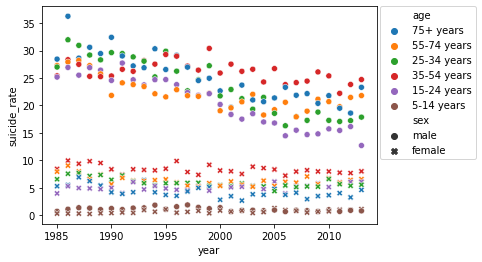

In [23]:
sns.scatterplot(y="suicide_rate", x="year", hue="age", style="sex", data=suicide_Canada)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [24]:
sr = suicide_Canada[["age", "sex", "suicide_rate"]]
sr.groupby(["sex", "age"]).describe()

suicide_rate                                            \
                          count       mean       std    min    25%    50%   
sex    age                                                                  
female 15-24 years         29.0   5.115862  0.621700   3.95   4.74   5.13   
       25-34 years         29.0   5.929310  0.822036   4.39   5.35   5.79   
       35-54 years         29.0   8.362069  0.760950   7.21   7.95   8.20   
       5-14 years          29.0   0.647586  0.286900   0.23   0.40   0.62   
       55-74 years         29.0   6.321379  0.899237   5.19   5.66   6.22   
       75+ years           29.0   4.302759  1.069602   2.66   3.64   4.10   
male   15-24 years         29.0  20.658276  4.682785  12.70  16.15  21.86   
       25-34 years         29.0  23.600000  5.118762  16.30  18.56  22.91   
       35-54 years         29.0  26.203448  1.835439  22.21  25.25  26.22   
       5-14 years          29.0   1.077586  0.334009   0.65   0.82   1.02   
       55-74 years         29.0  22.170345  2.847242  17.93  20.58  21.78   
       75+ years           29.0  25.222414  4.404716  18.61  21.79  24.54   

                                  
                      75%    max  
sex    age                        
female 15-24 years   5.37   6.11  
       25-34 years   6.45   7.68  
       35-54 years   8.58   9.94  
       5-14 years    0.85   1.28  
       55-74 years   6.56   9.03  
       75+ years     4.98   6.92  
male   15-24 years  24.70  27.73  
       25-34 years  28.31  31.97  
       35-54 years  27.49  30.40  
       5-14 years    1.30   1.87  
       55-74 years  23.45  28.20  
       75+ years    28.63  36.26

## ANOVA

In [25]:
suicide_Canada[['year']] = suicide[['year']].astype("category")
suicide.dtypes

C:\Users\vicki\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicide_rate          float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita          int64
generation             object
dtype: object

In [26]:
my_model = smf.ols(formula='suicide_rate ~ year + age + sex + year:sex + year:age + sex:age', data=suicide_Canada)
my_model_fit = my_model.fit()
sm.stats.anova_lm(my_model_fit, typ=2)

C:\Users\vicki\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 31, but rank is 19
  warnings.warn('covariance of constraints does not have full '
C:\Users\vicki\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\vicki\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 31, but rank is 28
  warnings.warn('covariance of constraints does not have full '
C:\Users\vicki\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 155, but rank is 140
  warnings.warn('covariance of constraints does not have

sum_sq     df            F         PR(>F)
year       1221.515841   31.0    13.442931   4.990681e-23
age        4015.668826    5.0   273.996131   3.963818e-49
sex       18822.474815    1.0  6421.452446  7.441847e-119
year:sex    628.363248   31.0     6.915214   2.056542e-15
year:age    548.803273  155.0     1.207929   1.324740e-01
sex:age    3814.073971    5.0   260.240961   5.106397e-69
Residual    410.366112  140.0          NaN            NaN

From this table, we can see that all of our main effect, year, age and sex are statistically significant. Our interaction effect between year and age is not significant, so we will not continue to look at the three-way interactions. But our anova table does not tell us which group pairs are different in means. We need to perform post hoc test to further look at the details.


## Post hoc test

C:\Users\vicki\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


<class 'statsmodels.iolib.table.SimpleTable'>

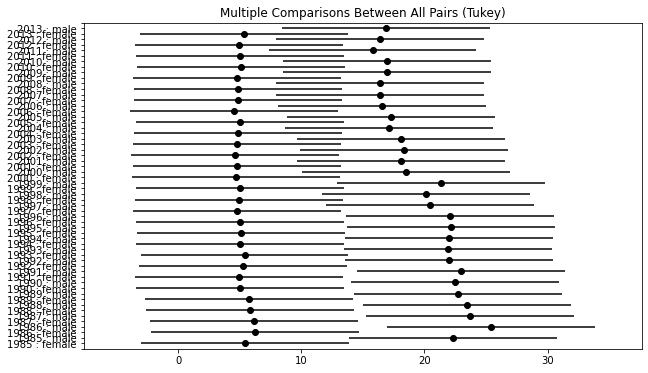

In [27]:
interaction_groups = suicide_Canada.year.astype(str) + " : "  + suicide_Canada.sex.astype(str)
comp = mc.MultiComparison(suicide_Canada["suicide_rate"], interaction_groups)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.plot_simultaneous()
post_hoc_res.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

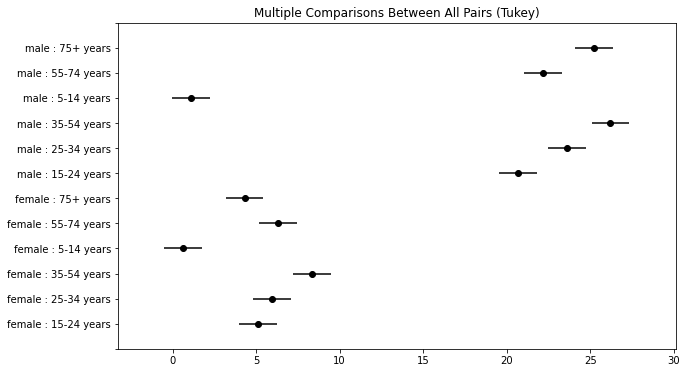

In [28]:
interaction_groups2 = suicide_Canada.sex.astype(str) + " : "  + suicide_Canada.age.astype(str)
comp = mc.MultiComparison(suicide_Canada["suicide_rate"], interaction_groups2)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.plot_simultaneous()
post_hoc_res.summary()

In [29]:
! pip install scikit-posthocs

In [30]:
import scikit_posthocs as sp

In [31]:
sp.posthoc_ttest(suicide, val_col='suicide_rate', group_col='age', p_adjust='holm')

15-24 years   35-54 years      75+ years    25-34 years  \
15-24 years   1.000000e+00  6.074778e-89  3.283107e-215   2.143196e-37   
35-54 years   6.074778e-89  1.000000e+00   7.902742e-67   2.191690e-16   
75+ years    3.283107e-215  7.902742e-67   1.000000e+00  7.066664e-123   
25-34 years   2.143196e-37  2.191690e-16  7.066664e-123   1.000000e+00   
55-74 years  4.693419e-121  1.205742e-03   6.992036e-50   4.688708e-31   
5-14 years    0.000000e+00  0.000000e+00   0.000000e+00   0.000000e+00   

               55-74 years  5-14 years  
15-24 years  4.693419e-121         0.0  
35-54 years   1.205742e-03         0.0  
75+ years     6.992036e-50         0.0  
25-34 years   4.688708e-31         0.0  
55-74 years   1.000000e+00         0.0  
5-14 years    0.000000e+00         1.0

## TEST ANOVA ASSUMPTIONS

In [32]:
from bioinfokit.analys import stat
res = stat()
res.tukey_hsd(df=suicide_Canada, res_var='suicide_rate', xfac_var='sex', anova_model='suicide_rate ~ C(year) + C(age)+C(sex)+C(age):C(sex)+C(year):C(sex)')
res.tukey_summary

C:\Users\vicki\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 31, but rank is 8
  warnings.warn('covariance of constraints does not have full '
C:\Users\vicki\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
C:\Users\vicki\anaconda3\lib\site-packages\statsmodels\base\model.py:1850: RuntimeWarning: invalid value encountered in true_divide
  F /= J
C:\Users\vicki\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 31, but rank is 8
  warnings.warn('covariance of constraints does not have full '


group1  group2       Diff     Lower      Upper    q-value  p-value
0   male  female  13.677778  12.92784  14.427715  51.330145    0.001

## QQ-Plot

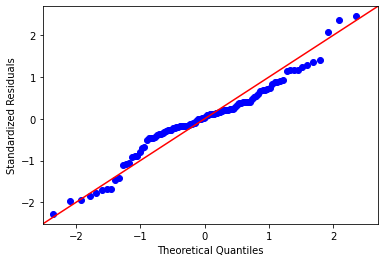

In [33]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

## Histogram

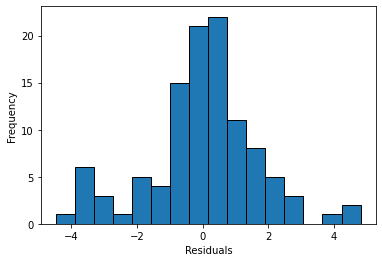

In [34]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

## Levene’s test

In [35]:
from bioinfokit.analys import stat 
res = stat()
res.levene(df=suicide_Canada, res_var='suicide_rate', xfac_var=['sex', 'age'])
res.levene_summary

Parameter    Value
0      Test statistics (W)   4.9896
1  Degrees of freedom (Df)  11.0000
2                  p value   0.0000